In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize

gramPositive_labels=['Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Pseudomonas Aeruginosa(+ve)']
gramNegative_labels=['Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)']

all_labels=['Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Pseudomonas Aeruginosa(+ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)']

labels = all_labels

labelsN = []
i=0
for label in labels:
    labelsN.append(int(i))
    i=i+1

def resize_all(src, pklname, include, width=2048, height=1532):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'bacteria images'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
    
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    #im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(im)
                    imH = np.fliplr(im)
                    imV = np.flipud(im)
                    #flipH
                    data['label'].append(subdir)
                    data['filename'].append("flipH_" + file)
                    data['data'].append(imH)
                    #flipV
                    data['label'].append(subdir)
                    data['filename'].append("flipV_" + file)
                    data['data'].append(imV)

 
        joblib.dump(data, pklname)

In [3]:
# modify to fit your system
data_path = 'D:/Xendal/University/Grad/Dataset'
os.listdir(data_path)

['Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Pseudomonas Aeruginosa(+ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)']

In [4]:
base_name = 'D:/Xendal/University/Grad/datasetPickle/augmented_bacteria'
width = 2048
height = 1532

gramPositive_include={'Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Pseudomonas Aeruginosa(+ve)'}

gramNegative_include={'Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)'}

all_include={'Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Pseudomonas Aeruginosa(+ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)'}

include = all_include
   
#resize_all(src=data_path, pklname=base_name, width=width, include=include,)

In [5]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{height}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  624
keys:  ['description', 'label', 'filename', 'data']
description:  bacteria images
image shape:  (1532, 2048, 3)
labels: ['Bifidobacterium spp(-ve)' 'Candida Albicans(-ve)'
 'Enterococcus faecalis(-ve)' 'Escherichia Coli(+ve)' 'Fusobacterium(+ve)'
 'Lactobacillus Gasseri(-ve)' 'Listeria Monocytogenes(-ve)'
 'Pseudomonas Aeruginosa(+ve)' 'Staphylococcus Epidermidis(-ve)'
 'Streptococcus Agalactiae(-ve)']


Counter({'Bifidobacterium spp(-ve)': 69,
         'Candida Albicans(-ve)': 60,
         'Enterococcus faecalis(-ve)': 60,
         'Escherichia Coli(+ve)': 60,
         'Fusobacterium(+ve)': 69,
         'Lactobacillus Gasseri(-ve)': 60,
         'Listeria Monocytogenes(-ve)': 66,
         'Pseudomonas Aeruginosa(+ve)': 60,
         'Staphylococcus Epidermidis(-ve)': 60,
         'Streptococcus Agalactiae(-ve)': 60})

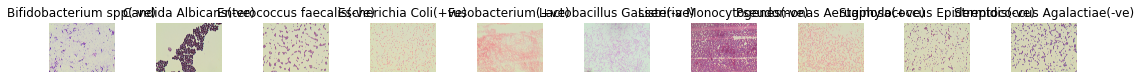

In [6]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [7]:
X = np.array(data['data'])
y = np.array(data['label'])

In [8]:
le = preprocessing.LabelEncoder()
le.fit(y)
y_labels_encoded = le.transform(y)

In [9]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_labels_encoded, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

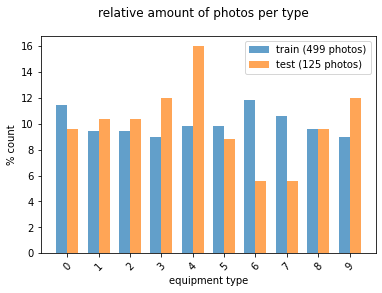

In [10]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

In [12]:
class ResizeTransformer(BaseEstimator, TransformerMixin):
    """
    Scales array to 1/3
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([resize(img, (img.shape[0] // 6.8, img.shape[1] // 6.8), anti_aliasing='True') for img in X])

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
import cv2 as cv
from skimage.transform import rescale

resizify = ResizeTransformer()

X_train_resize=resizify.fit_transform(X_train)

print(X_train.shape)
print(X_train_resize.shape)

(499, 1532, 2048, 3)
(499, 225, 301, 3)


In [14]:
X_test_resize=resizify.fit_transform(X_test)

print(X_test.shape)
print(X_test_resize.shape)

(125, 1532, 2048, 3)
(125, 225, 301, 3)


In [15]:
tf.keras.backend.clear_session()
VGG_model = VGG16(include_top=False, pooling='max', weights='imagenet') 

for layer in VGG_model.layers:
    layer.trainable = False

VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [16]:
#ann.summary()
feature_extractor=VGG_model.predict(X_train_resize)
X_train_feats = feature_extractor.reshape(feature_extractor.shape[0], -1)

print(X_train_feats.shape)
print(X_train_feats[:2])

(499, 512)
[[0.41741243 0.         1.5818031  ... 0.29542446 1.1568608  0.        ]
 [0.39948136 0.         0.44454506 ... 0.         1.0460341  0.        ]]


In [17]:
feature_extractor=VGG_model.predict(X_test_resize)
X_test_feats = feature_extractor.reshape(feature_extractor.shape[0], -1)

print(X_test_feats.shape)
print(X_test_feats[:2])

(125, 512)
[[0.38227808 0.         0.28836006 ... 0.         1.2550147  0.        ]
 [0.42466408 0.         0.23382491 ... 0.02088668 1.2557722  0.        ]]


In [18]:
from tensorflow.keras import datasets, layers, models

ann = models.Sequential([
        layers.Dense(500, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [19]:
from tensorflow.keras.optimizers import SGD,Adam
opt = SGD(lr=0.01)
ann.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = ann.fit(X_train_feats, y_train, epochs=100, steps_per_epoch=len(X_train_feats)/32, validation_data=(X_test_feats, y_test), batch_size=32)

Train on 499 samples, validate on 125 samples
Epoch 1/100
499/499 [==============================] - 2s 3ms/sample - loss: 2.1109 - accuracy: 0.2806 - val_loss: 1.9313 - val_accuracy: 0.4240
Epoch 2/100
499/499 [==============================] - 0s 122us/sample - loss: 1.8140 - accuracy: 0.4309 - val_loss: 1.6847 - val_accuracy: 0.5520
Epoch 3/100
499/499 [==============================] - 0s 122us/sample - loss: 1.6357 - accuracy: 0.5311 - val_loss: 1.5581 - val_accuracy: 0.4080
Epoch 4/100
499/499 [==============================] - 0s 120us/sample - loss: 1.4810 - accuracy: 0.5972 - val_loss: 1.5109 - val_accuracy: 0.4000
Epoch 5/100
499/499 [==============================] - 0s 102us/sample - loss: 1.3775 - accuracy: 0.6393 - val_loss: 1.3086 - val_accuracy: 0.6560
Epoch 6/100
499/499 [==============================] - 0s 116us/sample - loss: 1.2684 - accuracy: 0.6874 - val_loss: 1.2283 - val_accuracy: 0.7040
Epoch 7/100
499/499 [==============================] - 0s 102us/sample - l

In [20]:
ann.evaluate(X_test_feats,y_test)

125/125 [==============================] - 0s 144us/sample - loss: 0.1562 - accuracy: 0.9520


[0.1561609871983528, 0.952]

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test_feats)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       0.86      0.92      0.89        13
           3       0.94      1.00      0.97        15
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       0.80      1.00      0.89        12
           9       1.00      0.67      0.80        15

    accuracy                           0.95       125
   macro avg       0.96      0.96      0.95       125
weighted avg       0.96      0.95      0.95       125



In [22]:
#y_pred = ann.predict(X_test_feats)
#y_pred = le.inverse_transform(y_pred)
#y_test = le.inverse_transform(y_test)
print('Percentage correct: ', 100*np.sum(y_pred_classes == y_test)/len(y_test))

Percentage correct:  95.2


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

cmx=confusion_matrix(y_test, y_pred_classes, labels=labelsN)

df2 = pd.DataFrame(cmx, columns=labels, index=labels)
df2.columns.name = 'prediction'
df2.index.name = 'label'
df2

prediction,Bifidobacterium spp(-ve),Candida Albicans(-ve),Enterococcus faecalis(-ve),Escherichia Coli(+ve),Fusobacterium(+ve),Lactobacillus Gasseri(-ve),Listeria Monocytogenes(-ve),Pseudomonas Aeruginosa(+ve),Staphylococcus Epidermidis(-ve),Streptococcus Agalactiae(-ve)
label,,,,,,,,,,
Bifidobacterium spp(-ve),12,0,0,0,0,0,0,0,0,0
Candida Albicans(-ve),0,13,0,0,0,0,0,0,0,0
Enterococcus faecalis(-ve),0,0,12,1,0,0,0,0,0,0
Escherichia Coli(+ve),0,0,0,15,0,0,0,0,0,0
Fusobacterium(+ve),0,0,0,0,20,0,0,0,0,0
Lactobacillus Gasseri(-ve),0,0,0,0,0,11,0,0,0,0
Listeria Monocytogenes(-ve),0,0,0,0,0,0,7,0,0,0
Pseudomonas Aeruginosa(+ve),0,0,0,0,0,0,0,7,0,0
Staphylococcus Epidermidis(-ve),0,0,0,0,0,0,0,0,12,0


In [24]:
tp=0
fn=0
tn=0
fp=0

for i in range(len(labels)):
    for k in range(len(labels)):
        if k == i:
            tp+=cmx[i][k]
            if cmx[i][i]==0:
                fn+=1
        else:
            if cmx[i][k]!=0:
                fp+=cmx[i][k]
            else:
                tn+=1

                

print('TP:', tp)
print('FP:', fp)
print('TN:', tn)
print('FN:', fn)

prec=(tp/(tp+fp))*100
recall=(tp/(tp+fn))*100
acc=((tp+tn)/(tp+fp+tn+fn))*100
print('Precision:' + str(prec) +
     '\nRecall:' + str(recall) +
      '\nAccuracy:' + str(acc))

TP: 119
FP: 6
TN: 87
FN: 0
Precision:95.19999999999999
Recall:100.0
Accuracy:97.16981132075472


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


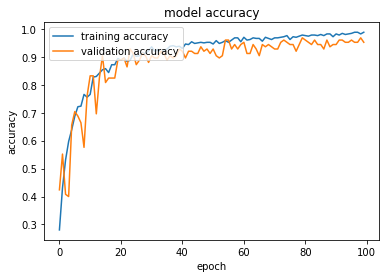

In [25]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

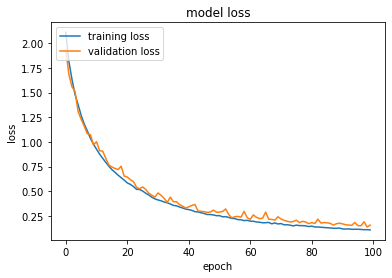

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

The prediction for this image is:  ['Enterococcus faecalis(-ve)']
The actual label for this image is:  ['Enterococcus faecalis(-ve)']


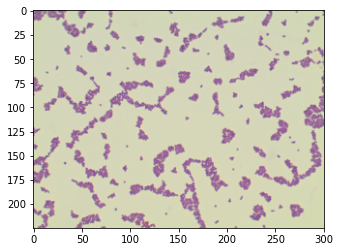

In [27]:
n=np.random.randint(0, X_test.shape[0])
img = X_test_resize[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
y_pred_rand = ann.predict(input_img_features)[0]

y_pred_rand_class = np.argmax(y_pred_rand)
y_pred_rand_class=le.inverse_transform([y_pred_rand_class])
y_actual = le.inverse_transform([y_test[n]])

print("The prediction for this image is: ", y_pred_rand_class)
print("The actual label for this image is: ", y_actual)